#Exercise 2 - Calibration and Inversion

##1. Introduction

In this exercise you will investigate the inversion of the forward model for forest backscatter that you have
used in the first exercise. The model inversion is used to retrieve soil moisture from backscatter observations.

As you know from the first exercise, backscatter does not only depend on soil moisture, but also on roughness, 
vegetation volume and water content, sand content, clay content, temperature, and the observation
configuration, i.e., the incidence angle and the signal frequency. The observation configuration is known,
but for the soil moisture inversion to be not under-determined, we need to know also the state of all
the other contributing geophysical parameters, in the following referred to as auxiliary parameters. The
procedure in which we obtain these parameter states and assign it to the inverse model is called calibration.

In the calibration you estimate the states of the auxiliary parameters, which are not retrieved in the inversion, 
but do also affect the backscatter signal. This is usually done using reference measurements for these parameters.
There are four major issues with this.

1. Sometimes we only have small-scale in situ measurements of the auxiliary parameters, but Earth
observation data usually have very large footprint sizes. Hence, it is not easy to obtain estimates of
for instance clay content or vegetation stem volume, which are representative for an area that might
be several hundred square kilometers large.
<br><br>
2. If large scale reference measurements exist, or can be obtained through spatial averaging, these are
sometimes not direct estimates of the parameters of interest, but of parameters related with it (e.g.,
NDVI measurements as an indicator for forest stem volume).
<br><br>
3. All reference measurements have a certain accuracy. Hence, errors in these will propagate also
through the retrieval model.
<br><br>
4. Sometimes we just don’t have reference measurements. In this case we have to either rely on our
experience and assume values that are valid for this region, or try to optimise them, until they
converge to a value that provides the ”most promising” retrieval of the target quantity, in our case
soil moisture.

##2. Datasets

###2.1 Backscatter data

The backscatter data that you will use are from the Advanced SCATterometer (ASCAT) onboard the
MetOp-A satellite. ASCAT is an active side-looking real aperture radar that observes at a spatial res-
olution of 25 km with a revisit time of approximately 3 days. The measurements are made in C-band
($f$ = 5.25 GHz, $\lambda$ ≈ 5 cm) in VV polarisation with an incidence angle range from 25 − 65 degrees. More-
over, it observes with three antennas on each side, referred to as fore-, mid-, and aft beam, pointing at 45,
90, and 135 degrees, with respect to the flying direction (see Figure 1). Thus, each observation is provided
as measurement triplet with three different backscatter values and incidence angles, obtained from the
three different beams.

<img src="ASCAT_geometry.JPG" alt="ASCAT geometry" style="width: 400px;"/>

###2.2 Auxiliary data

####2.2.1 Soil texture

Soil texture information is available from the Harmonized World Soil Database (HWSD), which contains
global soil texture information on a 1 km grid, collected and harmonized from different sources. You will
be provided with sand and clay information.

####2.2.2 In situ measurements

You will be provided with in situ measured soil moisture and precipitation to get a first impression how
the results should look like.

##3. Retrieval Method

The retrieval method used here is a non-linear optimization, in which the sum of the squared
differences between modelled and observed backscatter is minimized (see Equation (8) in Pulliainen et al.
(2003)):

$$min\;\sum_{i=1}^N{[\sigma^0_{modelled,i}(f,\theta,\Theta_V,V,ks,S,C,T,\Theta_S)\;-\;\sigma^0_{observed,i}]^2}$$

The idea is to find a set of model input parameters $(f,\theta,\Theta_V,V,ks,S,C,T,\Theta_S)$, for which the modelled
backscatter is closest to the actual measured backscatter. Once we have found this set, we have found
the soil moisture state $\Theta_S$ . Finding this set is done by making an arbitrary initial guess for the parameter states and then changing them until the minimum of the function $\sigma^0_{modelled}\;-\;\sigma^0_{observed}$ is reached.
<br><br>
One general problem with all optimization methods is ill-posedness. Different sets of input parameters
$(f,\theta,\Theta_V,V,ks,S,C,T,\Theta_S)$ can lead to the same model output. $f$ and $\theta$ are known, but we still need to calibrate the remaining auxiliary model parameters $(\Theta_V,V,ks,S,C,T)$, in order to get an unambiguous
estimate for $\Theta_S$. 
<br><br>
As mentioned in the introduction, the calibration can be done by (i) using reference
measurements of the parameters, (ii) making educated guesses of the parameters based on experience,
and (iii) include some of the parameters in the optimization. In the algorithm that you will use, all three
approaches are combined through the following steps:
<br>
1. We know that we have not only dynamic parameters that change over time, but also static parameters that can be assumed to remain constant. The dynamic parameters, which are soil moisture and
vegetation water content, must be optimised, whereas the static parameters must be calibrated. The
static parameters are soil structure ($S$, $C$), soil temperature ($T$), and surface roughness ($ks$), but
also stem volume ($V$), if we consider leaves and tree growth over a few years to be negligible.
<br><br>
2. From the sensitivity analysis in the first exercise you know that temperature changes have almost no
impact on backscatter. Hence, it can be kept constant with a rather arbitrary, but at least physically
meaningful value of for instance 20°C. Estimates for soil texture can be used from the
above mentioned HWSD. For roughness and stem volume, we have to make educated guesses and
manually check the obtained estimates of the dynamic parameters.
<br><br>
3. Since we are using the multi incidence angle capability of ASCAT, we have a certain number of
independent measurements and can thus try to include other parameters in the optimization. Ideally, these parameters should contribute to backscatter in an incidence angle depend way, such as
roughness. Note that even though other parameters can be included in the optimization, we presume them to be constant over the considered time scales. Hence, the optimization is performed
in two iterations: First, soil moisture, vegetation water content, and a selected third parameter is
optimised for the entire period. Then, the median obtained value of the optimised static parameter
is used as a constant value in the second iteration, in which only soil moisture and vegetation water
content are dynamic.

##4. Description of the study area

Soil moisture data from ASCAT is available globally with a spatial resolution of 25 km, resampled to a grid
with 12.5 km spacing between the individual grid points. The data that you will use is from one single grid
point located over agricultural fields in the US (see Figure 2) and covers the entire year 2009.
<br>An in situ monitoring station, named "Larned", is located within this pixel. It is operated by the Atmospheric Radiation Measurement (ARM) Climate Research Facility and provides ground measurements for
soil moisture and precipitation. 
<br><br>
The figure shows an aerial image of the used ASCAT pixel. The yellow cross marks the pixel center, the yellow box
the grid box extent (25 km x 25 km). The white circle marks the contained in situ monitoring station.
<img src="ascat_pixel.jpg" alt="Aerial image of the used ASCAT pixel" style="width: 700px;"/>
<br><br>
The in situ measurements illustrated in the next figure shall give you an indicator how your soil moisture retrievals obtained from ASCAT should roughly look like. Note that these do not have to match exactly, because of the large difference in the observed spatial scale.
<br><br>
<img src="larned_data.jpg" alt="In situ data from the monitoring station 'Larned'" style="width: 700px;"/>
<br><br>
According to the Harmonized World Soil Database (HWSD), the sand- and clay content should be 0.36
and 0.23, respectively. Note that HWSD data is provided on a 1 km grid, whereas ASCAT observes at 25
km spatial resolution. Hence, you should not take these values for granted but only use them as a starting
point.

##5. Source code description

The following parameters can be set:
* sand, clay: Sand and clay content [%] (0-1)
* temp: Temperature [°C]
* s_vol: Stem volume $[\frac{m^3}{ha}]$
* f_rms: Surface roughness $[\frac{s}{\lambda}]$ [-] 
* m_soil_x0: Initial value for soil moisture $[\frac{m^3m^{-3}}{m^3m^{-3}}]$ (0-0.6)
* m_veg_x0: Initial value for vegetation water content $[\frac{m^3m^{-3}}{m^3m^{-3}}]$ (0-1)
<br><br>

The parameters can also be set as a tuple:
<pre><code>
parameters = [{Parameter_set_1}, {Parameter_set_2}, {Parameter_set_3}, ...]
</code></pre>
<br><br>

Sand, clay, temperature, stem volume, and surface roughness are the static parameters that must be passed,
the x0 values for soil moisture and vegetation water content are the initial values to start the optimization.
These parameters are mandatory. Optionally, the name of a third dynamic parameter (’optional param’)
and a corresponding initial value (’optional x0’) can be included in the parameter list. This can be any of
the above mentioned static parameters. If this is the case, the optimization will be performed for all three
parameters and the median of the optimised optional parameter will be passed as static parameter in another optimization, this time only for soil moisture and vegetation water content. If passed as a tuple, the
retrieval will be directly compared within the same plot. Additionally, the time span (only within 2009!)
and the value range of the y-axis that shall be used in the plots can be optionally passed. If this is not
done, the entire year 2009 and the minimum and maximum values of soil moisture and vegetation water
content will be used as axes limits:

<pre><code>
parameters = [{Parameter_set_1}, {Parameter_set_2}, {Parameter_set_3}, ...]
ue.optimise(parameters,
            timespan = [’2009-03’, ’2009-06’],
            m_veg_axes_lim = [0, 1],
            m_soil_axes_lim = [0, 1])
</code></pre>

Example:
<pre><code>
parameters = [{’sand’: 0.36, ’clay’: 0.23, ’temp’: 20,
                ’s_vol’: 100, ’f_rms’: 0.2,
                ’m_veg_x0’: 0.5, ’m_soil_x0’: 0.01 },
                {’sand’: 0.36, ’clay’: 0.23, ’temp’: 20,
                ’s_vol’: 300, ’f_rms’: 0.2,
                ’m_veg_x0’: 0.5, ’m_soil_x0’: 0.01 }]
ue.optimise(parameters,
            timespan = [’2009-06’, ’2009-12’],
            m_veg_axes_lim = None,
            m_soil_axes_lim = None)
</code></pre>

##6. Code

In this exercise, you analyse the impact of changes in the calibration on the retrieved soil moisture estimates.
Unlike in the sensitivity analysis, you will be able to investigate the model behaviour for a complete time series here.

In [8]:
%matplotlib inline

In [9]:
import optimisation as ue

In [21]:
parameters = [{'sand': 0.36, 'clay': 0.23, 'temp': 20,
               's_vol': 100, 'f_rms': 0.2,
               'm_veg_x0': 0.5, 'm_soil_x0': 0.01},
              {'sand': 0.36, 'clay': 0.23, 'temp': 20,
               's_vol': 300, 'f_rms': 0.2,
               'm_veg_x0': 0.5, 'm_soil_x0': 0.01}]

# After changing the parameters, hit Shift+Enter to store the new values

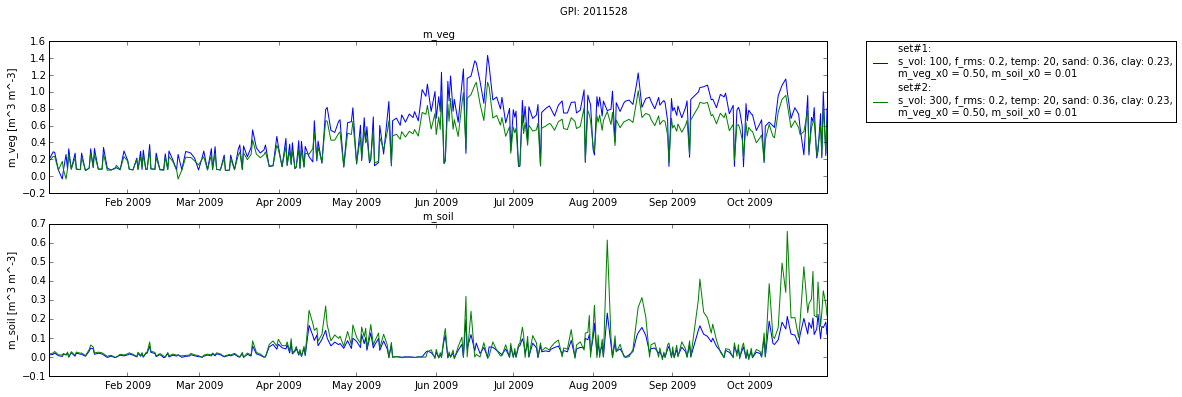

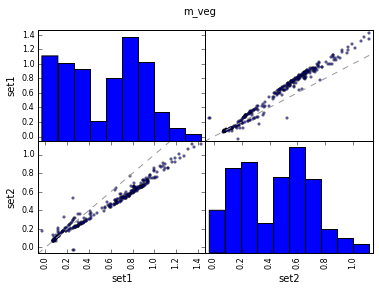

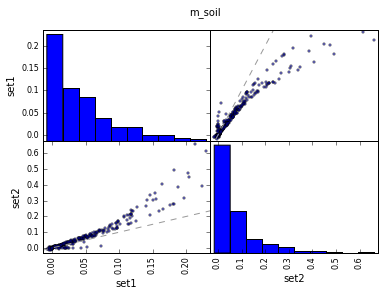

In [22]:
# Then run this code by hitting Shift+Enter
# If an error appears, try to run the above code again
# (Running the code may take a few seconds)
data = ue.optimise(parameters, timespan = ['2009-01', '2009-10'])

##7. Analysis

Try different parameter values in the above code and think about the following questions:
<br>
1. What is the impact of changes in the static calibration parameters? Which of them are of major/minor importance? In which way do they affect the optimised parameters (constant offset, scaling
parameter, ...)?
<br><br>
2. Include also other parameters in the optimization. Do they converge to physically meaningful values?
<br><br>
3. How does the choice of the initial values of the optimised parameters affect the result?
<br><br>
4. What parameter set gives in your opinion the "most realistic" looking soil moisture retrieval?
<br><br>
5. Do the parameters equally affect the entire time period? If not, do you have an idea, why?
<br><br>
6. Do your findings match to what you expect given what you have discovered in the first exercise? If
not, where did you discover discrepancies? Do you have an idea, where these might come from?

##8. References

Pulliainen, J., M. Engdahl, and M. Hallikainen (2003), Feasibility of multi-temporal interferometric sar
data for stand-level estimation of boreal forest stem volume, Remote Sensing of Environment, 85(4),
p. 397–409.